In [1]:
import pandas as pd
import numpy as np

In [2]:
dataBase = []

for i in range(1, 26):
    readValue = pd.read_table(r"C:\Users\Sina\Desktop\Stage V2\Data\ChimieVerteData2023\ChimieVerte_DataExportTobii/ChimieVerte2023 RecordingP"+str(i)+".tsv", sep='\t')
    dataBase.append(readValue)


C:\Users\Sina\AppData\Local\Temp\ipykernel_7432\564683606.py:4: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  readValue = pd.read_table(r"C:\Users\Sina\Desktop\Stage V2\Data\ChimieVerteData2023\ChimieVerte_DataExportTobii/ChimieVerte2023 RecordingP"+str(i)+".tsv", sep='\t')
C:\Users\Sina\AppData\Local\Temp\ipykernel_7432\564683606.py:4: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  readValue = pd.read_table(r"C:\Users\Sina\Desktop\Stage V2\Data\ChimieVerteData2023\ChimieVerte_DataExportTobii/ChimieVerte2023 RecordingP"+str(i)+".tsv", sep='\t')
C:\Users\Sina\AppData\Local\Temp\ipykernel_7432\564683606.py:4: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  readValue = pd.read_table(r"C:\Users\Sina\Desktop\Stage V2\Data\ChimieVerteData2023\ChimieVerte_DataExportTobii/ChimieVerte2023 Recor

In [3]:
dataBase[5][dataBase[5].index == 12000]

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
12000,181345430,22956864488,Eye Tracker,ChimieVerte2023,10/02/2023,P06,RecordingP06,09/02/2023,09/02/2023,15:09:32.840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
timestamps_tab = pd.read_excel(r"C:\Users\Sina\Desktop\Stage V2\Data\ChimieVerteData2023/chimieverte2023_Participant_timestamps.xlsx")
startTask=[]
endTask=[]
for i in range(0,25):
    
    tmpStart= "00:00:00.00" if type(timestamps_tab['Task start'][i]) == float  else timestamps_tab['Task start'][i]    
    hours, minutes, seconds = tmpStart.split(":")
    h = int(hours)
    m = int(minutes)
    s = float(seconds)
    ml = int(3600000000 * h + 60000000 * m + 1000000 * s)
     
    startTask.append(ml)

    tmpEnd= "00:00:00.00" if type( timestamps_tab['Task end'][i] )== float else timestamps_tab['Task end'][i]
    hours, minutes, seconds = tmpEnd.split(":")
    h = int(hours)
    m = int(minutes)
    s = float(seconds)
    ml = int(3600000000 * h + 60000000 * m + 1000000 * s)
    
    endTask.append(ml)
print(startTask)
print(endTask)

[189268000, 166109000, 167899000, 274876000, 325305000, 240914000, 238508000, 187246000, 183255000, 195052000, 179980000, 166124000, 32165999, 188962000, 142726000, 128001000, 215488000, 273326000, 144658000, 121064000, 209718000, 145245000, 173139000, 128087000, 142483000]
[629031000, 661108000, 683812000, 715616000, 1227411000, 681700000, 794410000, 629189000, 916680000, 935962000, 661003000, 606852000, 737798000, 665576000, 583662000, 658143000, 838726000, 1524846000, 585521000, 1108024000, 650371000, 585803000, 1165820000, 852307000, 2328946000]


In [5]:
dataBaseTask=[]

for i in range(0,25):
    dataBaseTask.append(dataBase[i].loc[(dataBase[i]["Recording timestamp"] >=startTask[i] ) & (dataBase[i]["Recording timestamp"] <=endTask[i])])

dataBaseTask[0].tail()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
38938,628964353,1391311412,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38939,628981007,1391328066,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38940,628997660,1391344719,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38941,629014315,1391361374,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38942,629030970,1391378029,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataEyeTracker=[]

for i in range(0,25):
    mask = dataBaseTask[i]['Sensor'].isin(['Eye Tracker'])
    dataEyeTracker.append(dataBaseTask[i].loc[mask])
dataEyeTracker[0].head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
12537,189275935,951622994,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12538,189292589,951639648,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12539,189309243,951656302,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12540,189325898,951672957,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12541,189342552,951689611,Eye Tracker,ChimieVerte2023,10/02/2023,P01,RecordingP01,09/02/2023,09/02/2023,09:25:49.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("\n\n****************************** valid, invalid, Eyes Not found [In task] ***************************")

matrice=[]
for i in range(25):
    
    indexEyesNotFound = dataEyeTracker[i][ dataEyeTracker[i]['Eye movement type'] =='EyesNotFound'].index
    indexUnclassified = dataEyeTracker[i][ dataEyeTracker[i]['Eye movement type'] ==  'Unclassified'].index
    fix = dataEyeTracker[i][ dataEyeTracker[i]['Eye movement type'] =='Fixation' ].index
    sac = dataEyeTracker[i][ dataEyeTracker[i]['Eye movement type'] =='Saccade' ].index
    
    indexInvalidLeft = dataEyeTracker[i][ dataEyeTracker[i]['Validity left'] == 'Invalid'].index
    indexInvalidRight = dataEyeTracker[i][ dataEyeTracker[i]['Validity right'] == 'Invalid'].index
    validLeft = dataEyeTracker[i][ dataEyeTracker[i]['Validity left'] == 'Valid'].index
    validRight = dataEyeTracker[i][ dataEyeTracker[i]['Validity right'] == 'Valid'].index
       
    matrice.append([len(indexEyesNotFound),
                    len(indexUnclassified),
                    len(fix)+len(sac),
                    str(int(((len(fix)+len(sac)) /len(dataEyeTracker[i]))*100))+" %",
                    len(indexInvalidLeft),
                    len(validLeft),
                    str(int((len(validLeft)/len(dataEyeTracker[i]))*100))+" %",
                    len(indexInvalidRight),
                    len(validRight),
                    str(int((len(validRight)/len(dataEyeTracker[i]))*100))+" %",
                    len(dataEyeTracker[i])])

columns = ['EyesNotFound ','Unclassified','faxation & saccade','% (Fix,Sac)','InvalidLeft','ValidLeft','% valid L','InvalidRight','ValidRight','% valid R','Total Rows']
index=["participant "+str(i) for i in range(1, 26)]

df = pd.DataFrame(data=matrice, index=index, columns=columns)
df




****************************** valid, invalid, Eyes Not found [In task] ***************************


,EyesNotFound,Unclassified,faxation & saccade,"% (Fix,Sac)",InvalidLeft,ValidLeft,% valid L,InvalidRight,ValidRight,% valid R,Total Rows
participant 1,10393,517,15484,58 %,10725,15669,59 %,10667,15727,59 %,26394
participant 2,14857,675,14123,47 %,15903,13752,46 %,15302,14353,48 %,29655
participant 3,20360,404,10092,32 %,20721,10135,32 %,20870,9986,32 %,30856
participant 4,5765,647,20046,75 %,7422,19036,71 %,6078,20380,77 %,26458
participant 5,26169,1135,26616,49 %,28269,25651,47 %,26841,27079,50 %,53920
participant 6,900,646,24920,94 %,1239,25227,95 %,1272,25194,95 %,26466
participant 7,16761,509,15572,47 %,17888,14954,45 %,17886,14956,45 %,32842
participant 8,9738,810,15967,60 %,10220,16295,61 %,10613,15902,59 %,26515
participant 9,17547,734,25164,57 %,18974,24471,56 %,19143,24302,55 %,43445
participant 10,21809,632,21482,48 %,22743,21180,48 %,22968,20955,47 %,43923


In [8]:
dataAllParticipants=[]

for i in range (0,25):

    dataAllMinute=[]

    pointDepart=dataEyeTracker[i].head(1).iloc[0]['Recording timestamp']
    endOfTime=dataEyeTracker[i].tail(1).iloc[0]['Recording timestamp']
    
    j=0
    while j < dataEyeTracker[i].index[-1]:
    
        pft=dataEyeTracker[i][dataEyeTracker[i]['Recording timestamp']>=pointDepart+60000000] #1 minute

        if pft.empty :
            pointFin =endOfTime
        else:
            pointFin=pft.head(1).iloc[0]['Recording timestamp']

        mask=(dataEyeTracker[i]['Recording timestamp']>=pointDepart)&( dataEyeTracker[i]['Recording timestamp']<=pointFin )
        dataInMinute=dataEyeTracker[i].loc[mask]
        dataAllMinute.append(dataInMinute)

        pointDepart=pointFin
        j=dataEyeTracker[i][dataEyeTracker[i]['Recording timestamp']==pointFin].index[0]
        
    dataAllParticipants.append(dataAllMinute)


In [9]:
dataAllParticipants[-1][1].head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
12857,202486604,2681034530,Eye Tracker,ChimieVerte2023,28/02/2023,P25,RecordingP25,28/02/2023,28/02/2023,13:34:57.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12858,202503257,2681051183,Eye Tracker,ChimieVerte2023,28/02/2023,P25,RecordingP25,28/02/2023,28/02/2023,13:34:57.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12859,202519912,2681067838,Eye Tracker,ChimieVerte2023,28/02/2023,P25,RecordingP25,28/02/2023,28/02/2023,13:34:57.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,202536567,2681084493,Eye Tracker,ChimieVerte2023,28/02/2023,P25,RecordingP25,28/02/2023,28/02/2023,13:34:57.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12861,202553221,2681101147,Eye Tracker,ChimieVerte2023,28/02/2023,P25,RecordingP25,28/02/2023,28/02/2023,13:34:57.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
AllParticipantMinParMin=[]

for j in range(0,25):
    matrice=[]
    for i in range(0,len(dataAllParticipants[j])):

        indexEyesNotFound = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Eye movement type'] =='EyesNotFound'].index
        indexUnclassified = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Eye movement type'] ==  'Unclassified'].index
        fix = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Eye movement type'] =='Fixation' ].index
        sac = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Eye movement type'] =='Saccade' ].index

        indexInvalidLeft = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Validity left'] == 'Invalid'].index
        indexInvalidRight = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Validity right'] == 'Invalid'].index
        validLeft = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Validity left'] == 'Valid'].index
        validRight = dataAllParticipants[j][i][ dataAllParticipants[j][i]['Validity right'] == 'Valid'].index

        matrice.append([len(indexEyesNotFound),
                        len(indexUnclassified),
                        len(fix)+len(sac),
                        str(int(((len(fix)+len(sac)) /len(dataAllParticipants[j][i]))*100))+" %",
                        len(indexInvalidLeft),
                        len(validLeft),
                        str(int((len(validLeft)/len(dataAllParticipants[j][i]))*100))+" %",
                        len(indexInvalidRight),
                        len(validRight),
                        str(int((len(validRight)/len(dataAllParticipants[j][i]))*100))+" %",
                        len(dataAllParticipants[j][i])])
    AllParticipantMinParMin.append(matrice)
    

In [11]:
print("\n****************************** valid , invalid , Eyes Not found [In task] ***************************\n")
n=3
print(" --Participant-- [ "+str(n),"]")
columns = ['EyesNotFound ','Unclassified','faxation & saccade','% (Fix,Sac)','InvalidLeft','ValidLeft','% valid L','InvalidRight','ValidRight','% valid R','Total Rows']
index=[]
for i in range(1,len(AllParticipantMinParMin[n-1])+1):
    index.append("Minute "+str(i))

df1 = pd.DataFrame(data=AllParticipantMinParMin[n-1],index=index,columns=columns)
df1


****************************** valid , invalid , Eyes Not found [In task] ***************************

 --Participant-- [ 3 ]


,EyesNotFound,Unclassified,faxation & saccade,"% (Fix,Sac)",InvalidLeft,ValidLeft,% valid L,InvalidRight,ValidRight,% valid R,Total Rows
Minute 1,2402,32,1161,32 %,2446,1149,31 %,2448,1147,31 %,3595
Minute 2,2954,21,603,16 %,2990,588,16 %,3190,388,10 %,3578
Minute 3,2700,43,846,23 %,2737,852,23 %,2722,867,24 %,3589
Minute 4,2025,19,1543,43 %,2040,1547,43 %,2059,1528,42 %,3587
Minute 5,1786,47,1756,48 %,1824,1765,49 %,1847,1742,48 %,3589
Minute 6,2388,117,1086,30 %,2444,1147,31 %,2421,1170,32 %,3591
Minute 7,2616,42,937,26 %,2677,918,25 %,2647,948,26 %,3595
Minute 8,2219,51,1323,36 %,2269,1324,36 %,2247,1346,37 %,3593
Minute 9,1274,32,841,39 %,1298,849,39 %,1293,854,39 %,2147


In [12]:
tableMinParMin=[]

columns = ['EyesNotFound ','Unclassified','faxation & saccade','% (Fix,Sac)','InvalidLeft','ValidLeft','% valid L','InvalidRight','ValidRight','% valid R','Total Rows']

for i in range(0,25):
    index=[]
    for j in range(1,len(AllParticipantMinParMin[i])+1):
        index.append("Minute "+str(j))
    tableMinParMin.append(pd.DataFrame(data=AllParticipantMinParMin[i],index=index,columns=columns))



****************************** valid , invalid , Eyes Not found [In task] ***************************

Paricipant 1


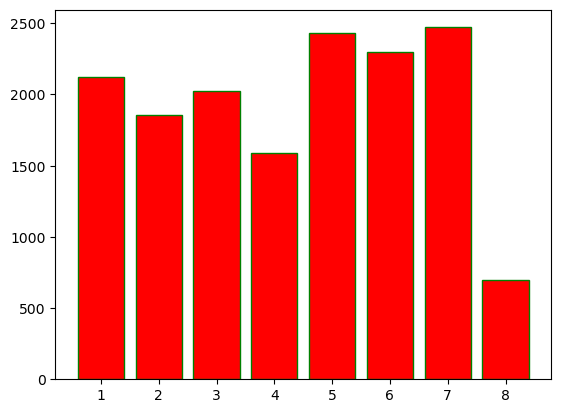

Paricipant 2


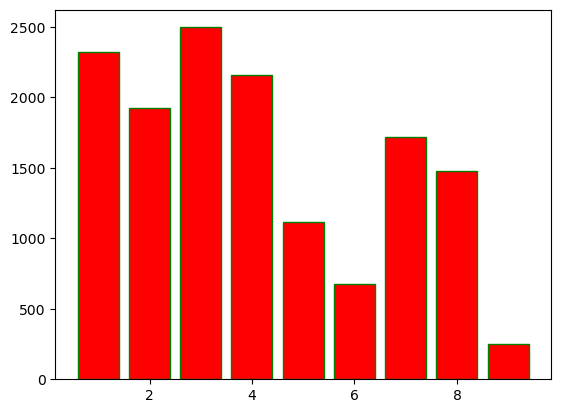

Paricipant 3


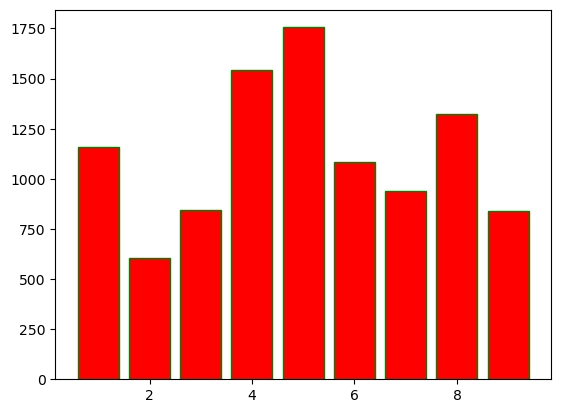

Paricipant 4


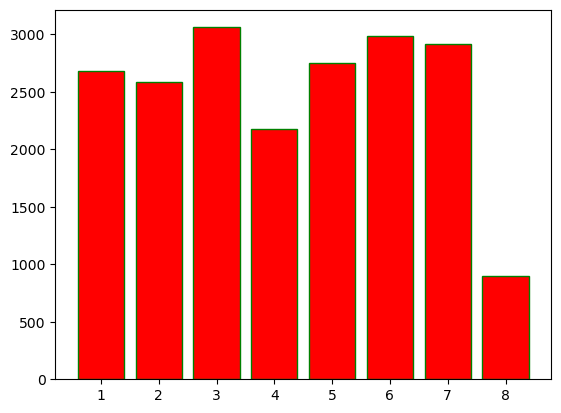

Paricipant 5


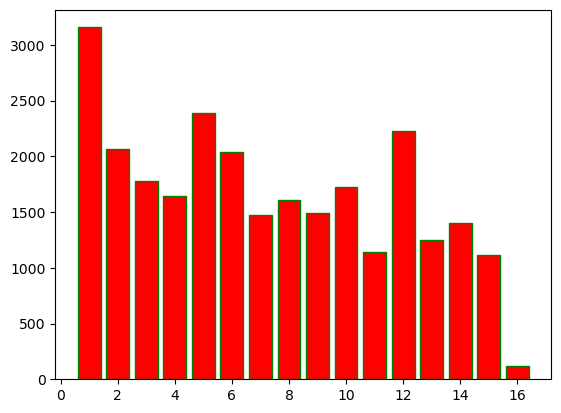

Paricipant 6


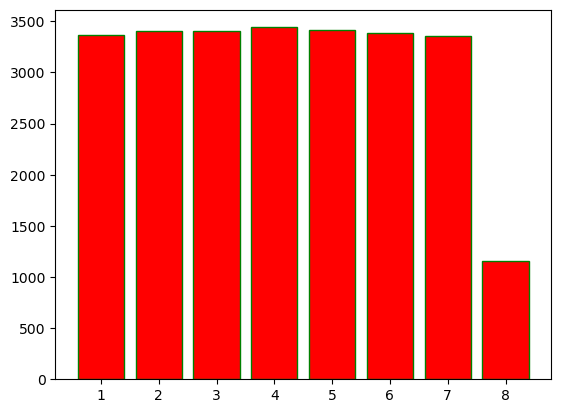

Paricipant 7


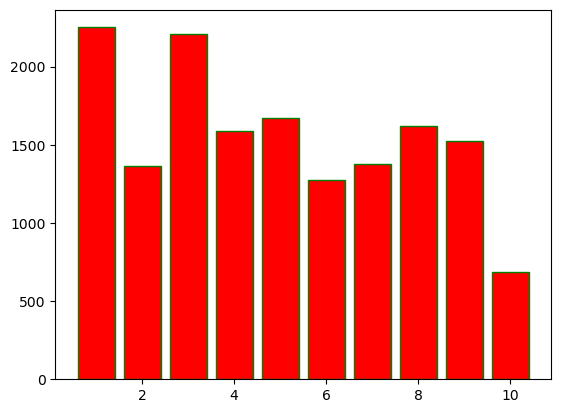

Paricipant 8


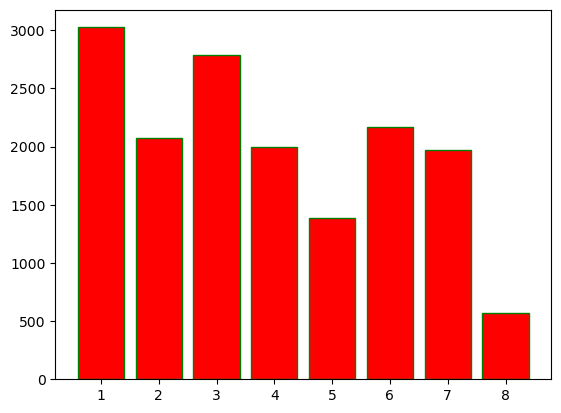

Paricipant 9


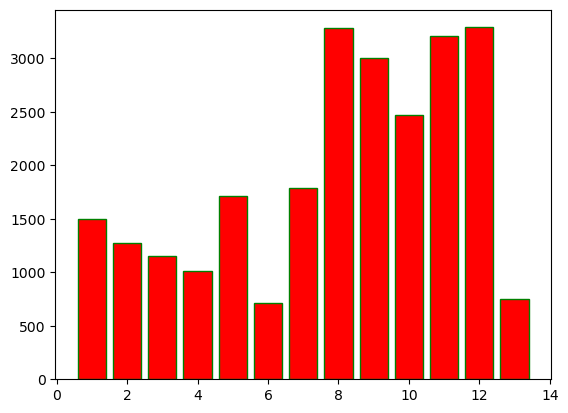

Paricipant 10


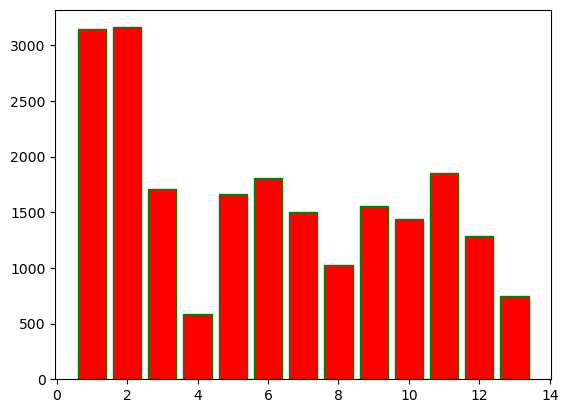

Paricipant 11


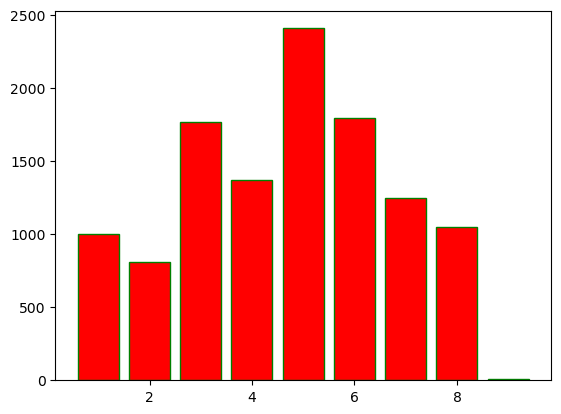

Paricipant 12


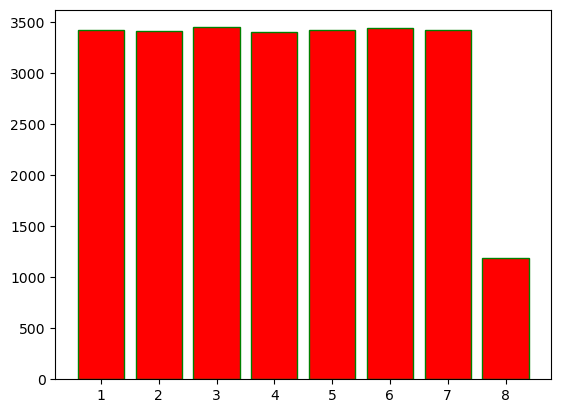

Paricipant 13


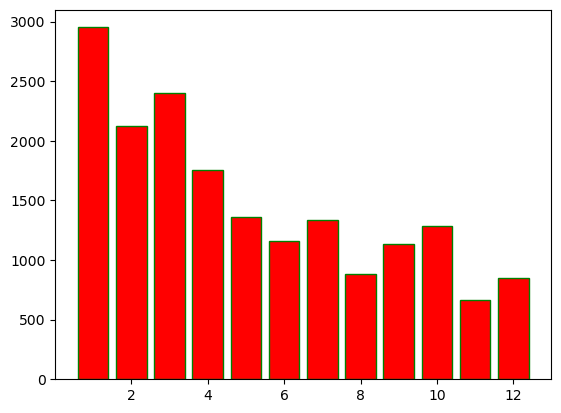

Paricipant 14


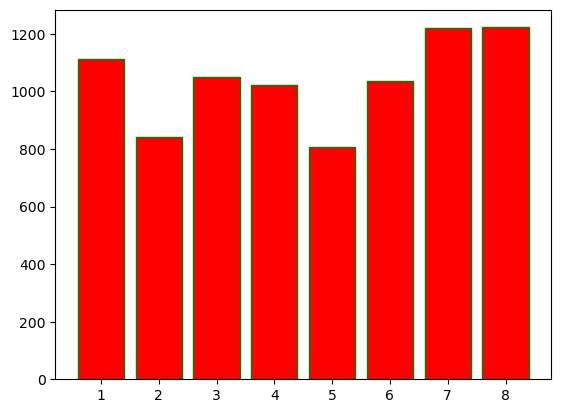

Paricipant 15


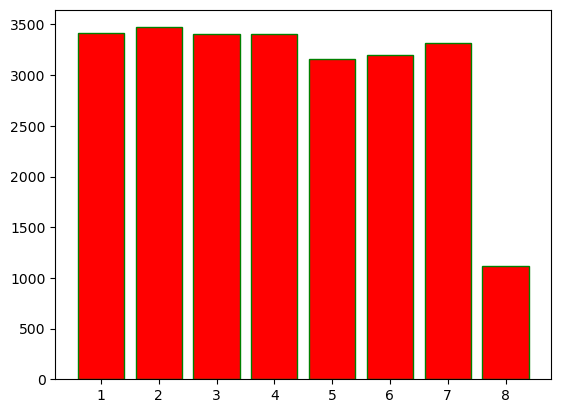

Paricipant 16


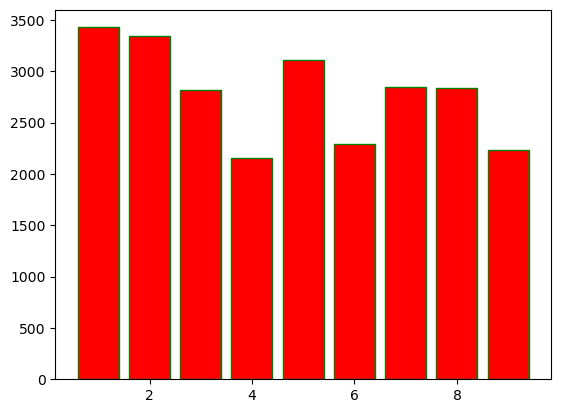

Paricipant 17


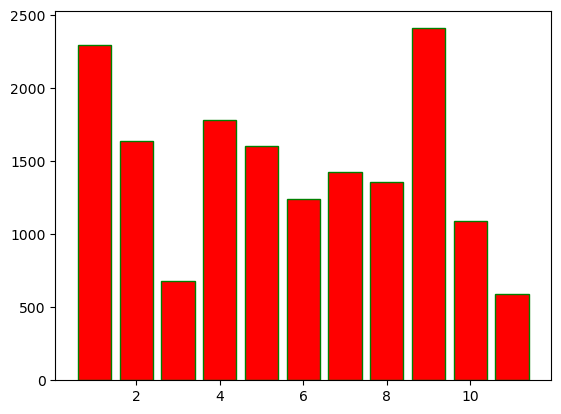

Paricipant 18


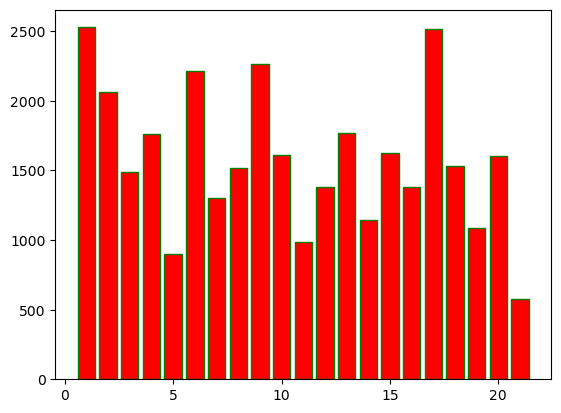

Paricipant 19


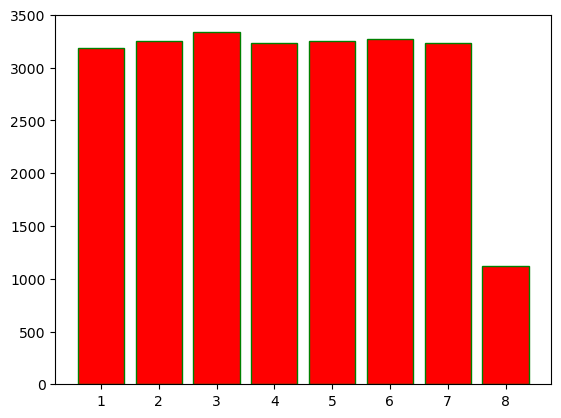

Paricipant 20


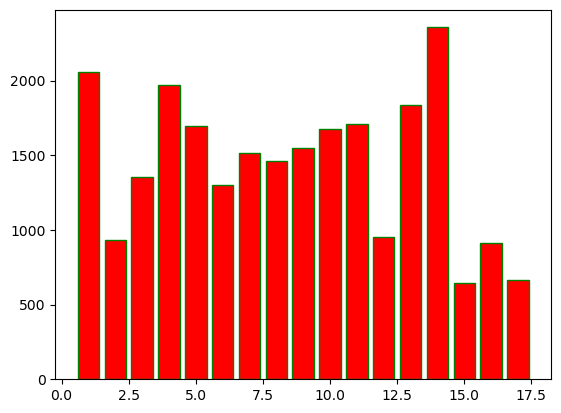

Paricipant 21


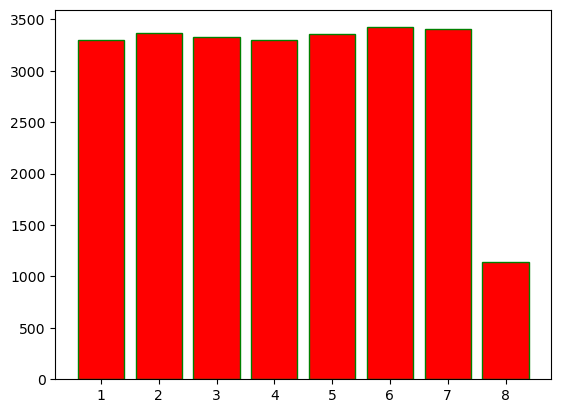

Paricipant 22


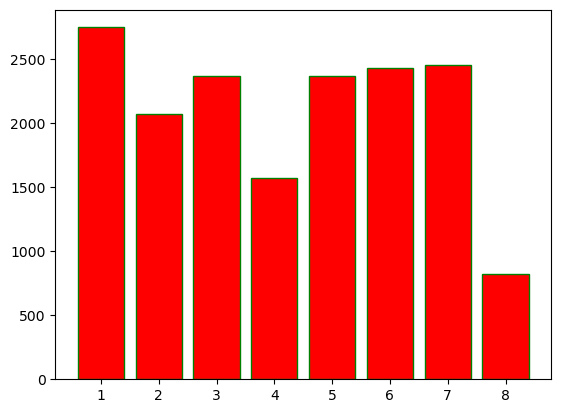

Paricipant 23


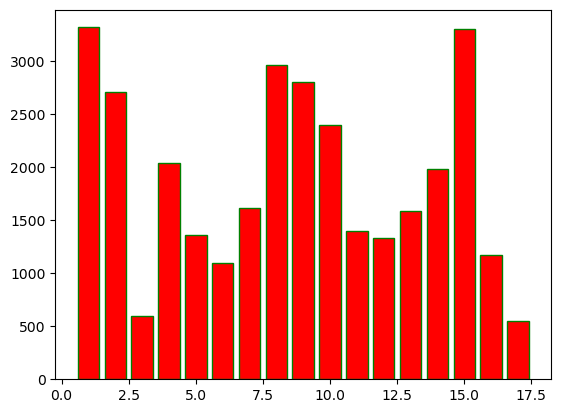

Paricipant 24


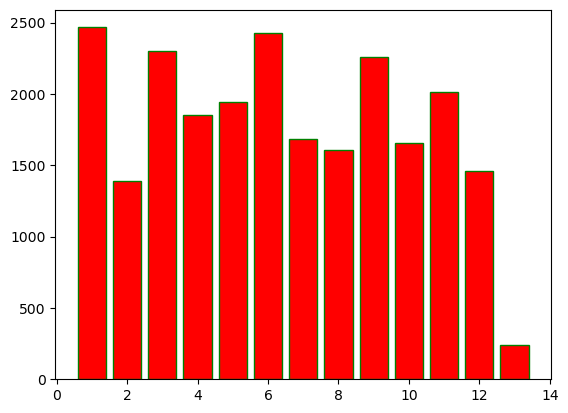

Paricipant 25


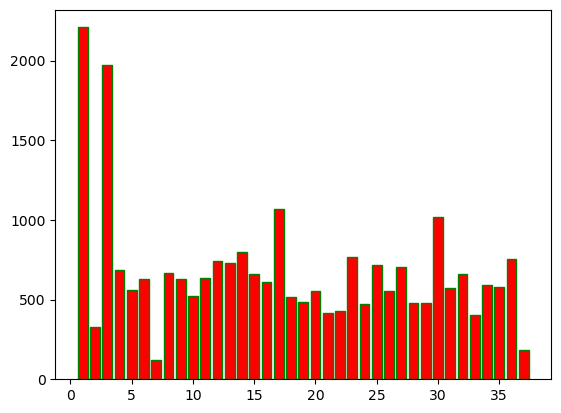

In [13]:
import matplotlib.pyplot as plt

print("\n****************************** valid , invalid , Eyes Not found [In task] ***************************\n")

for i in range(0,25):
    n=i
    print("Paricipant "+str(n+1))
    
    d=tableMinParMin[i]['faxation & saccade']
    x = [k+1 for k in range(len(d))]
    plt.bar(x,d, color = 'red',edgecolor = 'green') ; 
    plt.show() # Tracer


In [14]:
z=1
for j in range(0,25):
    
    mat=[]
    tmp=[]
    for i in dataEyeTracker[j].index:

        if ((dataEyeTracker[j].loc[[i],['Validity left']].values[0][0]=='Invalid') &
            (dataEyeTracker[j].loc[[i],['Validity right']].values[0][0]=='Invalid')):
            tmp.append(i)
        else :
            if len (tmp) >= 1 :
                mat.append(tmp)
                tmp=[]
    if len (tmp) >= 1 :
        mat.append(tmp)
    
    listitems =mat

    with open('InvalidDataIndex/participant_'+str(j+z)+'.txt', 'w') as temp_file:
    
        for item in listitems:
            if item == listitems[-1]:
                temp_file.write("%s"%item)
            else:
                temp_file.write("%s,"%item)
                

    print("invalid mat participant",j,"completed ! ")

invalid mat participant 0 completed ! 
invalid mat participant 1 completed ! 
invalid mat participant 2 completed ! 
invalid mat participant 3 completed ! 
invalid mat participant 4 completed ! 
invalid mat participant 5 completed ! 
invalid mat participant 6 completed ! 
invalid mat participant 7 completed ! 
invalid mat participant 8 completed ! 
invalid mat participant 9 completed ! 
invalid mat participant 10 completed ! 
invalid mat participant 11 completed ! 
invalid mat participant 12 completed ! 
invalid mat participant 13 completed ! 
invalid mat participant 14 completed ! 
invalid mat participant 15 completed ! 
invalid mat participant 16 completed ! 
invalid mat participant 17 completed ! 
invalid mat participant 18 completed ! 
invalid mat participant 19 completed ! 
invalid mat participant 20 completed ! 
invalid mat participant 21 completed ! 
invalid mat participant 22 completed ! 
invalid mat participant 23 completed ! 
invalid mat participant 24 completed ! 


In [15]:
InvalidMat=[]
tmpMat=[]
for i in range(1,26):

    lstr=[]
    l=[]
    tmpMat=[]
    tmp=[]

    file = open('InvalidDataIndex/participant_'+str(i)+'.txt', 'r')
        
    lstr=file.read().split('],[')

    tmp=list(map(int,lstr[0][1:].split(',')))
    tmpMat.append(tmp)
    tmp=[]
    for j in range(1,len(lstr)-1):
        tmp=list(map(int,lstr[j].split(',')))
        tmpMat.append(tmp)
        tmp=[]
        
    tmp=list(map(int,lstr[-1][:-1].split(',')))
    tmpMat.append(tmp)
    tmp=[]
    
    InvalidMat.append(tmpMat)


In [16]:
print([len(k) for k in InvalidMat[-1]])

[1, 1, 7, 1, 20, 1, 4, 1, 2, 48, 5, 1, 10, 4, 1, 24, 10, 6, 2, 2, 1, 3, 5, 1, 1, 4, 3, 10, 1, 1, 1, 1, 4, 5, 1, 1, 5, 6, 3, 1, 6, 1, 8, 1, 10, 8, 1, 7, 1, 4, 7, 2, 1, 2, 2, 2, 2, 3, 1, 2, 8, 2, 4, 1, 4, 6, 1, 9, 125, 59, 4, 2, 26, 1, 2, 10, 1, 1, 30, 67, 7, 4, 114, 7, 11, 12, 1, 8, 3, 6, 7, 92, 7, 5, 4, 4, 10, 298, 1, 1, 632, 331, 8, 4, 1, 72, 42, 4, 2, 8, 54, 4, 2, 6, 2, 34, 1, 2, 1, 238, 492, 176, 3, 2, 158, 8, 253, 11, 94, 34, 21, 15, 159, 1, 150, 6, 60, 1, 8, 246, 14, 10, 258, 1, 2, 1, 1, 4, 2, 4, 2, 4, 7, 32, 116, 7, 7, 1, 16, 30, 3, 9, 12, 1, 3, 1, 6, 6, 1, 7, 7, 8, 8, 8, 1, 3, 1, 1, 4, 26, 40, 50, 14, 2, 1, 4, 4, 1, 4, 5, 35, 12, 2, 4, 4, 10, 8, 6, 4, 2, 4, 5, 4, 7, 2, 3, 2, 20, 26, 8, 10, 4, 18, 10, 18, 24, 1, 1013, 5, 2, 3, 2, 42, 156, 20, 161, 61, 3, 37, 4, 305, 2, 1, 7, 103, 2, 40, 5, 54, 5, 1, 120, 1, 4, 924, 433, 337, 1, 1, 1, 2, 1, 38, 158, 37, 1, 34, 24, 33, 13, 2, 9, 1, 1, 3, 6, 32, 2, 2, 164, 11, 71, 2, 18, 748, 8, 1, 2, 460, 50, 1, 97, 48, 2, 130, 2, 1, 127, 201, 4, 4

In [17]:
print(InvalidMat[-1][-1])

[142680]


In [18]:
print([len(k) for k in mat])

[1, 1, 7, 1, 20, 1, 4, 1, 2, 48, 5, 1, 10, 4, 1, 24, 10, 6, 2, 2, 1, 3, 5, 1, 1, 4, 3, 10, 1, 1, 1, 1, 4, 5, 1, 1, 5, 6, 3, 1, 6, 1, 8, 1, 10, 8, 1, 7, 1, 4, 7, 2, 1, 2, 2, 2, 2, 3, 1, 2, 8, 2, 4, 1, 4, 6, 1, 9, 125, 59, 4, 2, 26, 1, 2, 10, 1, 1, 30, 67, 7, 4, 114, 7, 11, 12, 1, 8, 3, 6, 7, 92, 7, 5, 4, 4, 10, 298, 1, 1, 632, 331, 8, 4, 1, 72, 42, 4, 2, 8, 54, 4, 2, 6, 2, 34, 1, 2, 1, 238, 492, 176, 3, 2, 158, 8, 253, 11, 94, 34, 21, 15, 159, 1, 150, 6, 60, 1, 8, 246, 14, 10, 258, 1, 2, 1, 1, 4, 2, 4, 2, 4, 7, 32, 116, 7, 7, 1, 16, 30, 3, 9, 12, 1, 3, 1, 6, 6, 1, 7, 7, 8, 8, 8, 1, 3, 1, 1, 4, 26, 40, 50, 14, 2, 1, 4, 4, 1, 4, 5, 35, 12, 2, 4, 4, 10, 8, 6, 4, 2, 4, 5, 4, 7, 2, 3, 2, 20, 26, 8, 10, 4, 18, 10, 18, 24, 1, 1013, 5, 2, 3, 2, 42, 156, 20, 161, 61, 3, 37, 4, 305, 2, 1, 7, 103, 2, 40, 5, 54, 5, 1, 120, 1, 4, 924, 433, 337, 1, 1, 1, 2, 1, 38, 158, 37, 1, 34, 24, 33, 13, 2, 9, 1, 1, 3, 6, 32, 2, 2, 164, 11, 71, 2, 18, 748, 8, 1, 2, 460, 50, 1, 97, 48, 2, 130, 2, 1, 127, 201, 4, 4

In [19]:
RecoveryDataEyeTracker=[]
for j  in range(0,25):
    copy = dataEyeTracker[j].copy()
    indice=copy.index
    listIndex=indice.values.tolist()

    #print(copy.loc[[listIndex[listIndex.index(44926)-1]]].index[0])
    #print(copy.loc[[listIndex[listIndex.index(44926)+1]]].index[0])

    for i in InvalidMat[j] :
        if (len(i) <=4 )& (len(i)>0) : 
            if( listIndex.index(i[0]) >0) & (listIndex.index(i[-1]) < len(listIndex)-1):
                #print(i)
                #print((copy.loc[[copy.loc[[listIndex[listIndex.index(i[0])-1]]].index[0]],['Eye movement type']].values[0][0]))
                #print((copy.loc[[copy.loc[[listIndex[listIndex.index(i[-1])+1]]].index[0]],['Eye movement type']].values[0][0]) )
                if ((copy.loc[[copy.loc[[listIndex[listIndex.index(i[0])-1]]].index[0]],['Eye movement type']].values[0][0]=='Saccade' )&
                   (copy.loc[[copy.loc[[listIndex[listIndex.index(i[-1])+1]]].index[0]],['Eye movement type']].values[0][0]=='Saccade') ):
                        
                       
                    for e in i:
                        copy.loc[[e],['Eye movement type']]='Saccade'
                        copy.loc[[e],['Validity left']]='Valid'
                        copy.loc[[e],['Validity right']]='Valid'

                if ((copy.loc[[copy.loc[[listIndex[listIndex.index(i[0])-1]]].index[0]],['Eye movement type']].values[0][0]=='Fixation' )&
                   (copy.loc[[copy.loc[[listIndex[listIndex.index(i[-1])+1]]].index[0]],['Eye movement type']].values[0][0]=='Fixation') ):
                        
                       

                    for e in i:
                        copy.loc[[e],['Eye movement type']]='Fixation'
                        copy.loc[[e],['Validity left']]='Valid'
                        copy.loc[[e],['Validity right']]='Valid'

                if ((copy.loc[[copy.loc[[listIndex[listIndex.index(i[0])-1]]].index[0]],['Eye movement type']].values[0][0]=='Fixation' )&
                   (copy.loc[[copy.loc[[listIndex[listIndex.index(i[-1])+1]]].index[0]],['Eye movement type']].values[0][0]=='Saccade') ):
                        
                       

                    for e in i:
                        copy.loc[[e],['Eye movement type']]='Saccade'
                        copy.loc[[e],['Validity left']]='Valid'
                        copy.loc[[e],['Validity right']]='Valid'

                if ((copy.loc[[copy.loc[[listIndex[listIndex.index(i[0])-1]]].index[0]],['Eye movement type']].values[0][0]=='Saccade' )&
                   (copy.loc[[copy.loc[[listIndex[listIndex.index(i[-1])+1]]].index[0]],['Eye movement type']].values[0][0]=='Fixation') ):
                        
                       
                    for e in i:
                        copy.loc[[e],['Eye movement type']]='Fixation'
                        copy.loc[[e],['Validity left']]='Valid'
                        copy.loc[[e],['Validity right']]='Valid'

    RecoveryDataEyeTracker.append(copy)    
    n=j+1    
    print("Data Recovery for Participant_"+str(n)+"    created ! ")

Data Recovery for Participant_1    created ! 
Data Recovery for Participant_2    created ! 
Data Recovery for Participant_3    created ! 
Data Recovery for Participant_4    created ! 
Data Recovery for Participant_5    created ! 
Data Recovery for Participant_6    created ! 
Data Recovery for Participant_7    created ! 
Data Recovery for Participant_8    created ! 
Data Recovery for Participant_9    created ! 
Data Recovery for Participant_10    created ! 
Data Recovery for Participant_11    created ! 
Data Recovery for Participant_12    created ! 
Data Recovery for Participant_13    created ! 
Data Recovery for Participant_14    created ! 
Data Recovery for Participant_15    created ! 
Data Recovery for Participant_16    created ! 
Data Recovery for Participant_17    created ! 
Data Recovery for Participant_18    created ! 
Data Recovery for Participant_19    created ! 
Data Recovery for Participant_20    created ! 
Data Recovery for Participant_21    created ! 
Data Recovery for Part

In [22]:
for j in range(0,25):
    n=j+1

    RecoveryDataEyeTracker[j].to_csv("data_out/data_RecoveryDataEyeTracker/Recovery_Participant_"+str(n)+".tsv", sep='\t')                                  
    print("data file  Recovery_Participant_"+str(n)+".tsv    created ! ")

data file  Recovery_Participant_1.tsv    created ! 
data file  Recovery_Participant_2.tsv    created ! 
data file  Recovery_Participant_3.tsv    created ! 
data file  Recovery_Participant_4.tsv    created ! 
data file  Recovery_Participant_5.tsv    created ! 
data file  Recovery_Participant_6.tsv    created ! 
data file  Recovery_Participant_7.tsv    created ! 
data file  Recovery_Participant_8.tsv    created ! 
data file  Recovery_Participant_9.tsv    created ! 
data file  Recovery_Participant_10.tsv    created ! 
data file  Recovery_Participant_11.tsv    created ! 
data file  Recovery_Participant_12.tsv    created ! 
data file  Recovery_Participant_13.tsv    created ! 
data file  Recovery_Participant_14.tsv    created ! 
data file  Recovery_Participant_15.tsv    created ! 
data file  Recovery_Participant_16.tsv    created ! 
data file  Recovery_Participant_17.tsv    created ! 
data file  Recovery_Participant_18.tsv    created ! 
data file  Recovery_Participant_19.tsv    created ! 
da

In [23]:
print("\n\n****************************** valid , invalid , Eyes Not found [In Recovery data ] ***************************")

matriceRecovery=[]
for i in range(0,25):
    
    indexEyesNotFound = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Eye movement type'] =='EyesNotFound'].index
    indexUnclassified = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Eye movement type'] ==  'Unclassified'].index
    fix = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Eye movement type'] =='Fixation' ].index
    sac = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Eye movement type'] =='Saccade' ].index
    
    indexInvalidLeft = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Validity left'] == 'Invalid'].index
    indexInvalidRight = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Validity right'] == 'Invalid'].index
    validLeft = RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Validity left'] == 'Valid'].index
    validRight =RecoveryDataEyeTracker[i][ RecoveryDataEyeTracker[i]['Validity right'] == 'Valid'].index
       
    matriceRecovery.append([len(indexEyesNotFound),
                    len(indexUnclassified),
                    len(fix)+len(sac),
                    str(int(((len(fix)+len(sac)) /len(RecoveryDataEyeTracker[i]))*100))+" %",
                    len(indexInvalidLeft),
                    len(validLeft),
                    str(int((len(validLeft)/len(RecoveryDataEyeTracker[i]))*100))+" %",
                    len(indexInvalidRight),
                    len(validRight),
                    str(int((len(validRight)/len(RecoveryDataEyeTracker[i]))*100))+" %",
                    len(RecoveryDataEyeTracker[i])])

columns = ['EyesNotFound ','Unclassified','faxation & saccade','% (Fix,Sac)','InvalidLeft','ValidLeft','% valid L','InvalidRight','ValidRight','% valid R','Total Rows']
index=[]
for i in range(1,26):
    index.append("participant "+str(i))
    
#c='background-color: red' 

recoveryTable = pd.DataFrame(data=matriceRecovery,index=index,columns=columns)
recoveryTable



****************************** valid , invalid , Eyes Not found [In Recovery data ] ***************************


,EyesNotFound,Unclassified,faxation & saccade,"% (Fix,Sac)",InvalidLeft,ValidLeft,% valid L,InvalidRight,ValidRight,% valid R,Total Rows
participant 1,10338,517,15539,58 %,10662,15732,59 %,10604,15790,59 %,26394
participant 2,14795,675,14185,47 %,15824,13831,46 %,15223,14432,48 %,29655
participant 3,20326,404,10126,32 %,20686,10170,32 %,20835,10021,32 %,30856
participant 4,5689,647,20122,76 %,7319,19139,72 %,5975,20483,77 %,26458
participant 5,26088,1135,26697,49 %,28154,25766,47 %,26726,27194,50 %,53920
participant 6,870,646,24950,94 %,1208,25258,95 %,1241,25225,95 %,26466
participant 7,16654,509,15679,47 %,17775,15067,45 %,17773,15069,45 %,32842
participant 8,9668,810,16037,60 %,10135,16380,61 %,10528,15987,60 %,26515
participant 9,17424,734,25287,58 %,18835,24610,56 %,19004,24441,56 %,43445
participant 10,21684,632,21607,49 %,22603,21320,48 %,22828,21095,48 %,43923
